From the .csv files of "ResultXX" folder we need to make the data more beautiful

In [10]:
import os
import pandas as pd
from pathlib import Path
import glob
import matplotlib.pyplot as plt

### Get Data

In [11]:
# Define the local path to store the CSV files from the LabPC
local_results_folder = Path("./Data")

# Create the folder if it does not already exist
local_results_folder.mkdir(parents=True, exist_ok=True)

print(f"Local results folder set to: {local_results_folder.resolve()}")

# Check if the folder exists and delete all files inside it
if local_results_folder.exists():
    for file in local_results_folder.iterdir():
        if file.is_file():
            file.unlink()
    print("All files in the folder have been deleted.")



Local results folder set to: /home/george/Workshop/Interference/profiling/Data
All files in the folder have been deleted.


In [12]:
# Replace 'george@147.102.13.77' and the remote path with your actual credentials and remote paths
remote_path = "george@147.102.13.77:/home/george/Workspace/ResultsV06/*"

# Use shell command to securely copy all CSV files from remote
!scp {remote_path} {str(local_results_folder)}/ 

# enter passphrase for the remote server


container_metrics_agg_TC-VM-07_baseline.csv   100% 5987   445.0KB/s   00:00    
container_metrics_agg_TC-VM-07_cmembw100.csv  100% 5927   439.9KB/s   00:00    
container_metrics_agg_TC-VM-07_cpu100.csv     100% 5903   415.8KB/s   00:00    
container_metrics_agg_TC-VM-07_cpu50.csv      100% 5830   378.2KB/s   00:00    
container_metrics_detail_TC-VM-07_baseline.cs 100%   87KB   1.5MB/s   00:00    
container_metrics_detail_TC-VM-07_cmembw100.c 100%   87KB   2.3MB/s   00:00    
container_metrics_detail_TC-VM-07_cpu100.csv  100%   86KB   3.7MB/s   00:00    
container_metrics_detail_TC-VM-07_cpu50.csv   100%   86KB   2.5MB/s   00:00    
pcm_core_metrics_TC-VM-07_baseline.csv        100% 6580   499.0KB/s   00:00    
pcm_core_metrics_TC-VM-07_cmembw100.csv       100% 6580   340.7KB/s   00:00    
pcm_core_metrics_TC-VM-07_cpu100.csv          100% 6699   557.2KB/s   00:00    
pcm_core_metrics_TC-VM-07_cpu50.csv           100% 6602   488.1KB/s   00:00    
pcm_system_metrics_TC-VM-07_baseline.csv

In [13]:
# List all CSV files in the local_results_folder
csv_files = list(local_results_folder.glob("*.csv"))

if not csv_files:
    print("No CSV files found in the directory. Check SCP or paths.")
else:
    for f in csv_files:
        # Number of rows and columns in the CSV file
        num_rows = sum(1 for _ in open(f))
        num_cols = len(pd.read_csv(f, nrows=0).columns)
        print(f"File: {f.name}, Rows: {num_rows}, Columns: {num_cols}")


File: pcm_core_metrics_TC-VM-07_cpu50.csv, Rows: 13, Columns: 72
File: pcm_system_metrics_TC-VM-07_cpu100.csv, Rows: 13, Columns: 14
File: pcm_core_metrics_TC-VM-07_cmembw100.csv, Rows: 13, Columns: 72
File: perf_metrics_TC-VM-07_cmembw100.csv, Rows: 14, Columns: 19
File: pcm_system_metrics_TC-VM-07_cmembw100.csv, Rows: 13, Columns: 14
File: container_metrics_agg_TC-VM-07_cpu50.csv, Rows: 28, Columns: 13
File: perf_metrics_TC-VM-07_cpu50.csv, Rows: 14, Columns: 19
File: perf_metrics_TC-VM-07_baseline.csv, Rows: 14, Columns: 19
File: workload_metrics.csv, Rows: 5, Columns: 10
File: pcm_system_metrics_TC-VM-07_cpu50.csv, Rows: 13, Columns: 14
File: perf_metrics_TC-VM-07_cpu100.csv, Rows: 14, Columns: 19
File: pcm_core_metrics_TC-VM-07_cpu100.csv, Rows: 13, Columns: 72
File: container_metrics_agg_TC-VM-07_cpu100.csv, Rows: 28, Columns: 13
File: container_metrics_detail_TC-VM-07_cpu50.csv, Rows: 406, Columns: 14
File: pcm_core_metrics_TC-VM-07_baseline.csv, Rows: 13, Columns: 72
File: cont

### Types of data

In [14]:
file_patterns = {
    "perf": "*perf*.csv",
    "pcm_system": "*pcm_system*.csv",
    "pcm_cores": "*pcm_core*.csv",
    "container_detail": "*container_metrics_detail*.csv",
    "container_agg": "*container_metrics_agg*.csv",
    "workload": "*workload*.csv",
}

In [15]:
# Loop through each category and find the first matching CSV file.
for category, pattern in file_patterns.items():
    # Construct the search pattern
    search_pattern = os.path.join(local_results_folder, pattern)
    matching_files = glob.glob(search_pattern)
    
    # Check if there is at least one matching file
    if matching_files:
        # Select the first matching file
        selected_file = matching_files[0]
        
        # Read the CSV into a DataFrame
        df = pd.read_csv(selected_file)
        
        # Optionally, re-save the file with comma as separator and without the index.
        # If you prefer to keep the original file intact, you can comment out the next line.
        df.to_csv(selected_file, sep=",", index=False)
        
        print(f"=== Category: {category} - File: {os.path.basename(selected_file)} ===")
        display(df.head(5))  # Use display() if you're in a Jupyter Notebook, otherwise use print(df.head(5))
        print("\n")
    else:
        print(f"No file found for the category: {category}\n")

=== Category: perf - File: perf_metrics_TC-VM-07_cmembw100.csv ===


,time,task-clock,branches,branch-instructions,branch-misses,stalled-cycles-frontend,stalled-cycles-backend,bus-cycles,cache-references,cache-misses,LLC-loads,LLC-load-misses,LLC-stores,LLC-store-misses,cycle_activity.stalls_l3_miss,mem-loads,mem-stores,dtlb_load_misses.stlb_hit,page-faults
0,5.005043,NaN,10800213763,10831610513,226337086,NaN,NaN,1241164915,1222833154,460899462,158130556,76009022,194179085,172766065,44679405447,0,9756708493,297023418,166604
1,10.011050,NaN,12326533859,12246130491,280218524,NaN,NaN,1501824118,1369165719,523622924,194792851,94641188,238929674,209319967,55981989245,0,11051640685,362689582,90813
2,15.017149,NaN,12297558588,12246542262,282017717,NaN,NaN,1501188728,1375374672,523367097,197588873,95605527,239548259,209858303,56250457407,0,10985476832,368750095,53124
3,20.022751,NaN,12787524790,12737952456,279516245,NaN,NaN,1500701653,1365515729,523761595,197231130,97001135,232309765,203816408,56396975579,0,11448010741,369813248,44823
4,25.028046,NaN,12337664603,12413639482,277781089,NaN,NaN,1500567210,1372049338,523307836,195782241,95265175,238626069,210048243,56409691364,0,10990327496,363570363,39695




=== Category: pcm_system - File: pcm_system_metrics_TC-VM-07_cpu100.csv ===


,System - Date,System - Time,System - IPC,System - L3MISS,System - L2MISS,System - READ,System - WRITE,System - PhysIPC,System - PhysIPC%,System Core C-States - C0res%,System Core C-States - C1res%,System Core C-States - C6res%,System Pack C-States - C0res%,System Pack C-States - C6res%
0,2025-04-14,15:46:32.508,0.74,18.78,39.33,28.65,10.99,1.49,29.79,24.20,68.28,0.0,100.0,0.0
1,2025-04-14,15:46:37.507,0.73,23.16,48.29,34.30,13.27,1.45,29.04,29.09,70.91,0.0,100.0,0.0
2,2025-04-14,15:46:42.508,0.73,23.02,48.51,33.29,13.21,1.46,29.16,29.11,70.89,0.0,100.0,0.0
3,2025-04-14,15:46:47.507,0.71,22.66,49.24,32.40,13.36,1.41,28.22,29.12,70.88,0.0,100.0,0.0
4,2025-04-14,15:46:52.508,0.74,22.13,47.57,31.56,12.96,1.48,29.65,29.14,70.86,0.0,100.0,0.0




=== Category: pcm_cores - File: pcm_core_metrics_TC-VM-07_cpu50.csv ===


,System - Date,System - Time,System Core C-States - C0res%,System Core C-States - C1res%,System Core C-States - C6res%,SKT0 Core C-State - C0res%,SKT0 Core C-State - C1res%,SKT0 Core C-State - C6res%,Core0 (Socket 0) - IPC,Core0 (Socket 0) - L3MISS,...,Core6 (Socket 0) - PhysIPC,Core6 (Socket 0) - PhysIPC%,Core7 (Socket 0) - IPC,Core7 (Socket 0) - L3MISS,Core7 (Socket 0) - L2MISS,Core7 (Socket 0) - C0res%,Core7 (Socket 0) - C1res%,Core7 (Socket 0) - C6res%,Core7 (Socket 0) - PhysIPC,Core7 (Socket 0) - PhysIPC%
0,2025-04-14,16:21:41.710,6.23,86.50,0.0,6.23,86.50,0.0,1.01,0.19,...,1.14,22.87,0.70,1.02,2.08,9.76,80.97,0.0,1.40,28.00
1,2025-04-14,16:21:46.712,7.61,92.39,0.0,7.61,92.39,0.0,0.93,0.31,...,1.28,25.65,0.60,1.52,2.94,12.21,87.79,0.0,1.19,23.90
2,2025-04-14,16:21:51.713,7.62,92.38,0.0,7.62,92.38,0.0,0.83,0.44,...,1.12,22.48,0.72,1.41,2.50,12.19,87.81,0.0,1.45,28.98
3,2025-04-14,16:21:56.713,7.59,92.41,0.0,7.59,92.41,0.0,0.82,0.43,...,1.24,24.82,0.58,1.48,3.00,12.16,87.84,0.0,1.16,23.18
4,2025-04-14,16:22:01.713,7.61,92.39,0.0,7.61,92.39,0.0,0.76,0.46,...,1.19,23.88,0.59,1.39,2.97,12.14,87.86,0.0,1.18,23.51




=== Category: container_detail - File: container_metrics_detail_TC-VM-07_cpu50.csv ===


,TestCaseID,Interference,Date,Timestamp,Container_ID,Container_Name,CPU_Usage,Memory_Usage,Disk_IO_Read,Disk_IO_Write,FS Usage,Net_IO_In,Net_IO_Out,Processes
0,TC-VM-07,cpu50,2025-04-14,2025-04-14 16:21:27,0205185befff7ac438627fc14355ce2926f0f762048bc1...,socialnetwork_app_media-mongodb_1,0.002720,62803968.0,NaN,NaN,1069056.0,0.0,0.0,NaN
1,TC-VM-07,cpu50,2025-04-14,2025-04-14 16:21:32,0205185befff7ac438627fc14355ce2926f0f762048bc1...,socialnetwork_app_media-mongodb_1,0.005208,63066112.0,NaN,NaN,1069056.0,0.0,0.0,NaN
2,TC-VM-07,cpu50,2025-04-14,2025-04-14 16:21:37,0205185befff7ac438627fc14355ce2926f0f762048bc1...,socialnetwork_app_media-mongodb_1,0.002937,62803968.0,NaN,NaN,1069056.0,0.0,0.0,NaN
3,TC-VM-07,cpu50,2025-04-14,2025-04-14 16:21:42,0205185befff7ac438627fc14355ce2926f0f762048bc1...,socialnetwork_app_media-mongodb_1,0.003686,61394944.0,NaN,NaN,1069056.0,0.0,0.0,NaN
4,TC-VM-07,cpu50,2025-04-14,2025-04-14 16:21:47,0205185befff7ac438627fc14355ce2926f0f762048bc1...,socialnetwork_app_media-mongodb_1,0.002597,56291328.0,NaN,NaN,1069056.0,0.0,0.0,NaN




=== Category: container_agg - File: container_metrics_agg_TC-VM-07_cpu50.csv ===


,TestCaseID,Interference,Date,Container_ID,Container_Name,Avg_CPU_Usage,Avg_Memory_Usage,Avg_Disk_IO_Read,Avg_Disk_IO_Write,Avg_FS_Usage,Avg_Net_IO_In,Avg_Net_IO_Out,Avg_Processes
0,TC-VM-07,cpu50,2025-04-14,0205185befff7ac438627fc14355ce2926f0f762048bc1...,socialnetwork_app_media-mongodb_1,0.003207,5.314205e+07,NaN,NaN,1069056.0,0.000000e+00,0.000000e+00,NaN
1,TC-VM-07,cpu50,2025-04-14,063fe4f75fba4a3a1afacddd1ca633a88a6dd898d7a833...,socialnetwork_app_user-mongodb_1,0.598967,5.850044e+07,NaN,NaN,1601536.0,2.088872e+05,7.813514e+05,NaN
2,TC-VM-07,cpu50,2025-04-14,0a6fd8f084a0218dd52f50fbf46e91ced84e691eab2b70...,socialnetwork_app_unique-id-service_1,0.066620,2.395887e+06,NaN,NaN,118784.0,1.608308e+05,1.077698e+05,NaN
3,TC-VM-07,cpu50,2025-04-14,0f3c24833adc183e35730c0ccdf10f581d61f7951f6c77...,socialnetwork_app_post-storage-mongodb_1,0.164530,2.705042e+08,NaN,NaN,1191936.0,1.136334e+06,1.057911e+05,NaN
4,TC-VM-07,cpu50,2025-04-14,16ca4b7fe7d911364fc3031c9ce55931cdf62144268d64...,socialnetwork_app_post-storage-service_1,0.160268,5.514581e+06,NaN,NaN,188416.0,1.240328e+06,1.542354e+06,NaN




=== Category: workload - File: workload_metrics.csv ===


,TestCaseID,Interference,Date,Throughput,Avg_Latency,P50_Latency,P75_Latency,P90_Latency,P99_Latency,Max_Latency
0,TC-VM-07,baseline,2025-04-14,989.19,51350.0,33090.0,67200.0,121660.0,261380.0,560640.0
1,TC-VM-07,cpu100,2025-04-14,847.64,4500000.0,4100000.0,6310000.0,8360000.0,11280000.0,14170000.0
2,TC-VM-07,cmembw100,2025-04-14,648.41,12040000.0,11950000.0,16640000.0,19460000.0,22450000.0,25560000.0
3,TC-VM-07,cpu50,2025-04-14,879.13,4170000.0,3930000.0,5590000.0,7230000.0,9790000.0,15130000.0


In [16]:
# Show the list of columns for each category
for category, pattern in file_patterns.items():
    # Construct the search pattern
    search_pattern = os.path.join(local_results_folder, pattern)
    matching_files = glob.glob(search_pattern)
    
    # Check if there is at least one matching file
    if matching_files:
        # Select the first matching file
        selected_file = matching_files[0]
        
        # Read the CSV into a DataFrame
        df = pd.read_csv(selected_file)
        
        print(f"=== Category: {category} - File: {os.path.basename(selected_file)} ===")
        print(df.columns.tolist())
        print("\n")
    else:
        print(f"No file found for the category: {category}\n")

=== Category: perf - File: perf_metrics_TC-VM-07_cmembw100.csv ===
['time', 'task-clock', 'branches', 'branch-instructions', 'branch-misses', 'stalled-cycles-frontend', 'stalled-cycles-backend', 'bus-cycles', 'cache-references', 'cache-misses', 'LLC-loads', 'LLC-load-misses', 'LLC-stores', 'LLC-store-misses', 'cycle_activity.stalls_l3_miss', 'mem-loads', 'mem-stores', 'dtlb_load_misses.stlb_hit', 'page-faults']


=== Category: pcm_system - File: pcm_system_metrics_TC-VM-07_cpu100.csv ===
['System - Date', 'System - Time', 'System - IPC', 'System - L3MISS', 'System - L2MISS', 'System - READ', 'System - WRITE', 'System - PhysIPC', 'System - PhysIPC%', 'System Core C-States - C0res%', 'System Core C-States - C1res%', 'System Core C-States - C6res%', 'System Pack C-States - C0res%', 'System Pack C-States - C6res%']


=== Category: pcm_cores - File: pcm_core_metrics_TC-VM-07_cpu50.csv ===
['System - Date', 'System - Time', 'System Core C-States - C0res%', 'System Core C-States - C1res%', 'S

### Handle System Data

In [17]:
# For the pcm system files we don't need "System Pack C-States" related columns
# We can drop them from the DataFrame
def drop_c_states_columns(df):
    """
    Drop columns related to "System Pack C-States" from the DataFrame.
    """
    # Identify columns that contain "System Pack C-States"
    c_states_columns = [col for col in df.columns if "System Pack C-States" in col]
    
    # Drop those columns
    df.drop(columns=c_states_columns, inplace=True, errors='ignore')
    
    return df

# Call this function for all files that belong to the "pcm_system" category
for category, pattern in file_patterns.items():
    # Construct the search pattern
    search_pattern = os.path.join(local_results_folder, pattern)
    matching_files = glob.glob(search_pattern)
    
    # Check if there are matching files
    if matching_files:
        for selected_file in matching_files:
            # Read the CSV into a DataFrame
            df = pd.read_csv(selected_file)
            
            # Drop C-States columns if applicable
            if category == "pcm_system":
                df = drop_c_states_columns(df)
                print(f"=== Category: {category} - File: {os.path.basename(selected_file)} ===")
                display(df.head(5))
    else:
        print(f"No file found for the category: {category}\n")


=== Category: pcm_system - File: pcm_system_metrics_TC-VM-07_cpu100.csv ===


,System - Date,System - Time,System - IPC,System - L3MISS,System - L2MISS,System - READ,System - WRITE,System - PhysIPC,System - PhysIPC%,System Core C-States - C0res%,System Core C-States - C1res%,System Core C-States - C6res%
0,2025-04-14,15:46:32.508,0.74,18.78,39.33,28.65,10.99,1.49,29.79,24.20,68.28,0.0
1,2025-04-14,15:46:37.507,0.73,23.16,48.29,34.30,13.27,1.45,29.04,29.09,70.91,0.0
2,2025-04-14,15:46:42.508,0.73,23.02,48.51,33.29,13.21,1.46,29.16,29.11,70.89,0.0
3,2025-04-14,15:46:47.507,0.71,22.66,49.24,32.40,13.36,1.41,28.22,29.12,70.88,0.0
4,2025-04-14,15:46:52.508,0.74,22.13,47.57,31.56,12.96,1.48,29.65,29.14,70.86,0.0


=== Category: pcm_system - File: pcm_system_metrics_TC-VM-07_cmembw100.csv ===


,System - Date,System - Time,System - IPC,System - L3MISS,System - L2MISS,System - READ,System - WRITE,System - PhysIPC,System - PhysIPC%,System Core C-States - C0res%,System Core C-States - C1res%,System Core C-States - C6res%
0,2025-04-14,15:48:26.737,0.56,3.13,6.54,40.24,18.05,1.12,22.42,5.05,86.73,0.0
1,2025-04-14,15:48:31.735,0.51,3.95,8.15,42.22,18.23,1.01,20.29,6.12,93.88,0.0
2,2025-04-14,15:48:36.735,0.50,4.04,8.34,42.23,18.14,1.00,20.00,6.09,93.91,0.0
3,2025-04-14,15:48:41.735,0.52,4.03,8.23,42.08,17.88,1.04,20.86,6.11,93.89,0.0
4,2025-04-14,15:48:46.735,0.51,4.00,8.15,42.21,18.11,1.01,20.24,6.10,93.90,0.0


=== Category: pcm_system - File: pcm_system_metrics_TC-VM-07_cpu50.csv ===


,System - Date,System - Time,System - IPC,System - L3MISS,System - L2MISS,System - READ,System - WRITE,System - PhysIPC,System - PhysIPC%,System Core C-States - C0res%,System Core C-States - C1res%,System Core C-States - C6res%
0,2025-04-14,16:21:41.710,0.69,5.11,10.49,28.11,11.13,1.38,27.52,6.23,86.50,0.0
1,2025-04-14,16:21:46.712,0.67,6.59,13.17,34.66,13.56,1.33,26.63,7.61,92.39,0.0
2,2025-04-14,16:21:51.713,0.67,6.54,13.08,34.46,13.59,1.35,26.94,7.62,92.38,0.0
3,2025-04-14,16:21:56.713,0.67,6.36,13.25,33.81,13.80,1.34,26.75,7.59,92.41,0.0
4,2025-04-14,16:22:01.713,0.66,6.35,13.27,33.08,13.95,1.31,26.29,7.61,92.39,0.0


=== Category: pcm_system - File: pcm_system_metrics_TC-VM-07_baseline.csv ===


,System - Date,System - Time,System - IPC,System - L3MISS,System - L2MISS,System - READ,System - WRITE,System - PhysIPC,System - PhysIPC%,System Core C-States - C0res%,System Core C-States - C1res%,System Core C-States - C6res%
0,2025-04-14,15:42:30.414,0.67,3.64,7.98,30.60,10.98,1.35,26.94,4.62,86.34,0.0
1,2025-04-14,15:42:35.414,0.56,5.19,11.33,37.71,14.55,1.12,22.38,6.10,93.90,0.0
2,2025-04-14,15:42:40.413,0.54,5.19,11.49,37.24,14.36,1.07,21.48,5.99,94.01,0.0
3,2025-04-14,15:42:45.414,0.52,4.83,11.10,36.69,13.52,1.05,20.97,5.53,94.47,0.0
4,2025-04-14,15:42:50.414,0.53,4.97,11.11,36.93,13.85,1.05,21.09,5.65,94.35,0.0


### Handle Core Data

In [18]:
# For all the files in the "pcm_cores" category, we can drop the following columns:
# 'System Core C-States - C0res%', 'System Core C-States - C1res%', 'System Core C-States - C6res%'
def drop_core_c_states_columns(df):
    """
    Drop columns related to "System Core C-States" from the DataFrame.
    """
    # Identify columns that contain "System Core C-States"
    core_c_states_columns = [
        'System Core C-States - C0res%', # Already existed in pcm_system files
        'System Core C-States - C1res%',
        'System Core C-States - C6res%', 
        'SKT0 Core C-State - C0res%',  # Socket 0 is the only socket I got!
        'SKT0 Core C-State - C1res%', 
        'SKT0 Core C-State - C6res%'
    ]
    
    # Drop those columns
    df.drop(columns=core_c_states_columns, inplace=True, errors='ignore')
    
    return df
# Call this function for all files that belong to the "pcm_cores" category
for category, pattern in file_patterns.items():
    # Construct the search pattern
    search_pattern = os.path.join(local_results_folder, pattern)
    matching_files = glob.glob(search_pattern)
    
    # Check if there are matching files
    if matching_files:
        for selected_file in matching_files:
            # Read the CSV into a DataFrame
            df = pd.read_csv(selected_file)
            
            # Drop Core C-States columns if applicable
            if category == "pcm_cores":
                df = drop_core_c_states_columns(df)
                print(f"=== Category: {category} - File: {os.path.basename(selected_file)} ===")
                display(df.head(5))
    else:
        print(f"No file found for the category: {category}\n")


=== Category: pcm_cores - File: pcm_core_metrics_TC-VM-07_cpu50.csv ===


,System - Date,System - Time,Core0 (Socket 0) - IPC,Core0 (Socket 0) - L3MISS,Core0 (Socket 0) - L2MISS,Core0 (Socket 0) - C0res%,Core0 (Socket 0) - C1res%,Core0 (Socket 0) - C6res%,Core0 (Socket 0) - PhysIPC,Core0 (Socket 0) - PhysIPC%,...,Core6 (Socket 0) - PhysIPC,Core6 (Socket 0) - PhysIPC%,Core7 (Socket 0) - IPC,Core7 (Socket 0) - L3MISS,Core7 (Socket 0) - L2MISS,Core7 (Socket 0) - C0res%,Core7 (Socket 0) - C1res%,Core7 (Socket 0) - C6res%,Core7 (Socket 0) - PhysIPC,Core7 (Socket 0) - PhysIPC%
0,2025-04-14,16:21:41.710,1.01,0.19,0.44,5.04,84.88,0.0,2.03,40.53,...,1.14,22.87,0.70,1.02,2.08,9.76,80.97,0.0,1.40,28.00
1,2025-04-14,16:21:46.712,0.93,0.31,0.68,6.09,93.91,0.0,1.86,37.29,...,1.28,25.65,0.60,1.52,2.94,12.21,87.79,0.0,1.19,23.90
2,2025-04-14,16:21:51.713,0.83,0.44,0.93,6.10,93.90,0.0,1.66,33.15,...,1.12,22.48,0.72,1.41,2.50,12.19,87.81,0.0,1.45,28.98
3,2025-04-14,16:21:56.713,0.82,0.43,0.94,6.09,93.91,0.0,1.64,32.76,...,1.24,24.82,0.58,1.48,3.00,12.16,87.84,0.0,1.16,23.18
4,2025-04-14,16:22:01.713,0.76,0.46,1.05,6.11,93.89,0.0,1.51,30.25,...,1.19,23.88,0.59,1.39,2.97,12.14,87.86,0.0,1.18,23.51


=== Category: pcm_cores - File: pcm_core_metrics_TC-VM-07_cmembw100.csv ===


,System - Date,System - Time,Core0 (Socket 0) - IPC,Core0 (Socket 0) - L3MISS,Core0 (Socket 0) - L2MISS,Core0 (Socket 0) - C0res%,Core0 (Socket 0) - C1res%,Core0 (Socket 0) - C6res%,Core0 (Socket 0) - PhysIPC,Core0 (Socket 0) - PhysIPC%,...,Core6 (Socket 0) - PhysIPC,Core6 (Socket 0) - PhysIPC%,Core7 (Socket 0) - IPC,Core7 (Socket 0) - L3MISS,Core7 (Socket 0) - L2MISS,Core7 (Socket 0) - C0res%,Core7 (Socket 0) - C1res%,Core7 (Socket 0) - C6res%,Core7 (Socket 0) - PhysIPC,Core7 (Socket 0) - PhysIPC%
0,2025-04-14,15:48:26.737,0.45,0.44,0.90,4.87,84.03,0.0,0.90,17.94,...,1.17,23.43,0.43,0.43,0.87,4.88,84.67,0.0,0.86,17.14
1,2025-04-14,15:48:31.735,0.61,0.41,0.87,6.13,93.87,0.0,1.22,24.42,...,0.85,17.07,0.47,0.51,1.10,6.11,93.89,0.0,0.94,18.84
2,2025-04-14,15:48:36.735,0.59,0.43,0.88,6.09,93.91,0.0,1.18,23.69,...,0.97,19.40,0.50,0.49,1.02,6.10,93.90,0.0,1.00,20.08
3,2025-04-14,15:48:41.735,0.57,0.47,0.97,6.10,93.90,0.0,1.13,22.69,...,1.08,21.68,0.49,0.53,1.07,6.11,93.89,0.0,0.98,19.63
4,2025-04-14,15:48:46.735,0.66,0.39,0.79,6.11,93.89,0.0,1.33,26.56,...,0.98,19.66,0.49,0.49,1.00,6.09,93.91,0.0,0.97,19.48


=== Category: pcm_cores - File: pcm_core_metrics_TC-VM-07_cpu100.csv ===


,System - Date,System - Time,Core0 (Socket 0) - IPC,Core0 (Socket 0) - L3MISS,Core0 (Socket 0) - L2MISS,Core0 (Socket 0) - C0res%,Core0 (Socket 0) - C1res%,Core0 (Socket 0) - C6res%,Core0 (Socket 0) - PhysIPC,Core0 (Socket 0) - PhysIPC%,...,Core6 (Socket 0) - PhysIPC,Core6 (Socket 0) - PhysIPC%,Core7 (Socket 0) - IPC,Core7 (Socket 0) - L3MISS,Core7 (Socket 0) - L2MISS,Core7 (Socket 0) - C0res%,Core7 (Socket 0) - C1res%,Core7 (Socket 0) - C6res%,Core7 (Socket 0) - PhysIPC,Core7 (Socket 0) - PhysIPC%
0,2025-04-14,15:46:32.508,1.00,1.83,3.98,29.77,69.28,0.0,1.99,39.82,...,1.12,22.46,0.63,1.13,2.27,9.82,80.79,0.0,1.25,25.09
1,2025-04-14,15:46:37.507,0.73,3.07,6.37,30.64,69.36,0.0,1.45,29.07,...,1.25,24.93,0.81,1.09,2.22,12.23,87.77,0.0,1.62,32.36
2,2025-04-14,15:46:42.508,0.75,2.88,6.07,30.65,69.35,0.0,1.49,29.89,...,1.34,26.90,0.75,1.15,2.39,12.21,87.79,0.0,1.51,30.16
3,2025-04-14,15:46:47.507,0.70,2.93,6.42,30.65,69.35,0.0,1.41,28.12,...,1.34,26.88,0.72,1.14,2.47,12.24,87.76,0.0,1.44,28.72
4,2025-04-14,15:46:52.508,0.71,3.00,6.46,30.68,69.32,0.0,1.42,28.35,...,1.45,29.04,0.78,1.11,2.38,12.23,87.77,0.0,1.56,31.14


=== Category: pcm_cores - File: pcm_core_metrics_TC-VM-07_baseline.csv ===


,System - Date,System - Time,Core0 (Socket 0) - IPC,Core0 (Socket 0) - L3MISS,Core0 (Socket 0) - L2MISS,Core0 (Socket 0) - C0res%,Core0 (Socket 0) - C1res%,Core0 (Socket 0) - C6res%,Core0 (Socket 0) - PhysIPC,Core0 (Socket 0) - PhysIPC%,...,Core6 (Socket 0) - PhysIPC,Core6 (Socket 0) - PhysIPC%,Core7 (Socket 0) - IPC,Core7 (Socket 0) - L3MISS,Core7 (Socket 0) - L2MISS,Core7 (Socket 0) - C0res%,Core7 (Socket 0) - C1res%,Core7 (Socket 0) - C6res%,Core7 (Socket 0) - PhysIPC,Core7 (Socket 0) - PhysIPC%
0,2025-04-14,15:42:30.414,0.49,0.51,1.10,4.60,86.47,0.0,0.98,19.58,...,1.40,28.02,0.68,0.48,1.01,4.63,85.99,0.0,1.36,27.13
1,2025-04-14,15:42:35.414,0.49,0.68,1.47,6.09,93.91,0.0,0.98,19.53,...,1.13,22.67,0.61,0.63,1.40,6.11,93.89,0.0,1.23,24.59
2,2025-04-14,15:42:40.413,0.49,0.65,1.46,5.99,94.01,0.0,0.99,19.79,...,1.05,20.92,0.54,0.65,1.43,5.96,94.04,0.0,1.08,21.68
3,2025-04-14,15:42:45.414,0.50,0.62,1.39,5.53,94.47,0.0,1.00,19.91,...,1.05,20.95,0.55,0.59,1.37,5.60,94.40,0.0,1.10,21.97
4,2025-04-14,15:42:50.414,0.57,0.59,1.32,5.67,94.33,0.0,1.14,22.79,...,1.00,20.01,0.53,0.63,1.42,5.71,94.29,0.0,1.06,21.18


### Handle Container Data

### Handle Workload Data

In [19]:
# The workload df is the one in the category "workload"
# Lets name it "social_network_workload.df"
social_network_workload_df = pd.DataFrame()
# Call this function for all files that belong to the "workload" category
for category, pattern in file_patterns.items():
    # Construct the search pattern
    search_pattern = os.path.join(local_results_folder, pattern)
    matching_files = glob.glob(search_pattern)
    
    # Check if there are matching files
    if matching_files:
        for selected_file in matching_files:
            if category == "workload":
                social_network_workload_df = pd.read_csv(selected_file)
                print(f"=== Category: {category} - File: {os.path.basename(selected_file)} ===")
                display(social_network_workload_df.head(5))
    else:
        print(f"No file found for the category: {category}\n")

=== Category: workload - File: workload_metrics.csv ===


,TestCaseID,Interference,Date,Throughput,Avg_Latency,P50_Latency,P75_Latency,P90_Latency,P99_Latency,Max_Latency
0,TC-VM-07,baseline,2025-04-14,989.19,51350.0,33090.0,67200.0,121660.0,261380.0,560640.0
1,TC-VM-07,cpu100,2025-04-14,847.64,4500000.0,4100000.0,6310000.0,8360000.0,11280000.0,14170000.0
2,TC-VM-07,cmembw100,2025-04-14,648.41,12040000.0,11950000.0,16640000.0,19460000.0,22450000.0,25560000.0
3,TC-VM-07,cpu50,2025-04-14,879.13,4170000.0,3930000.0,5590000.0,7230000.0,9790000.0,15130000.0


### Baseline Enstablishment

In [20]:
# Create the baseline df. This df holds only the baseline data regarding throughput and latency.
# It is the row of workload_metrics.csv with "Interference"=="Baseline"
def create_baseline_df(df):
    """
    Create a DataFrame that holds only the baseline data regarding throughput and latency.
    """
    # Filter the DataFrame for rows where "Interference" is "Baseline"
    baseline_df = df[df["Interference"] == "baseline"]
    
    # Drop the "Interference" column
    baseline_df.drop(columns=["Interference"], inplace=True, errors='ignore')
    
    return baseline_df

baseline_df = pd.DataFrame()

# Call this function for all files that belong to the "workload" category
for category, pattern in file_patterns.items():
    # Construct the search pattern
    search_pattern = os.path.join(local_results_folder, pattern)
    matching_files = glob.glob(search_pattern)
    
    # Check if there are matching files
    if matching_files:
        for selected_file in matching_files:
            # Read the CSV into a DataFrame
            df = pd.read_csv(selected_file)
            
            # Create baseline df if applicable
            if category == "workload":
                baseline_df = create_baseline_df(df)
                print(f"=== Category: {category} - File: {os.path.basename(selected_file)} ===")
                display(baseline_df.head(5))
    else:
        print(f"No file found for the category: {category}\n")

=== Category: workload - File: workload_metrics.csv ===


/tmp/ipykernel_5441/1458957556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_df.drop(columns=["Interference"], inplace=True, errors='ignore')


,TestCaseID,Date,Throughput,Avg_Latency,P50_Latency,P75_Latency,P90_Latency,P99_Latency,Max_Latency
0,TC-VM-07,2025-04-14,989.19,51350.0,33090.0,67200.0,121660.0,261380.0,560640.0


## 2. Perfomance

1) Normalized Throughput Performance (NTP)

   Definition:
     NTP = Measured_Throughput / Baseline_Throughput

   Parameters:
   - Measured_Throughput: The throughput of the workload under interference (e.g., "Throughput" field in the CSV for a given scenario).
   - Baseline_Throughput: The throughput of the workload under the baseline (no interference). Typically, this is the “Throughput” value from a row where "Interference" = "baseline".

   Interpretation:
   - NTP > 1  => Application throughput exceeded the baseline
   - NTP < 1  => Application throughput degraded relative to baseline
   - NTP = 1  => No observed change vs. baseline


2) Normalized Latency Performance (NLP)

   Definition:
     NLP = Measured_Latency / Baseline_Latency

   Parameters:
   - Measured_Latency: A latency statistic (e.g., "Avg_Latency", "P90_Latency", "P99_Latency") for the scenario under interference.
   - Baseline_Latency: The corresponding latency statistic from the baseline scenario (where "Interference" = "baseline").

   Interpretation:
   - NLP > 1  => Latency is higher (worse) than baseline
   - NLP < 1  => Latency is lower (better) than baseline
   - NLP = 1  => No change in latency vs. baseline

   Note:
   You may apply NLP to any latency metric: P50, P75, P90, P99, etc. Choose whichever best suits your SLA or QoS focus.


3) QoS Degradation

   Definition (as a % increase in latency):
     QoS Degradation(%) = ((Measured_Latency - Baseline_Latency) / Baseline_Latency) * 100

   Parameters:
   - Measured_Latency: The same “Avg_Latency” or tail latency (e.g., "P99_Latency") under interference.
   - Baseline_Latency: The same latency value in the baseline scenario.

   Interpretation:
   - A positive value indicates how many percentage points slower the application is compared to the baseline.
   - Example: If baseline latency is 100 ms, and measured latency is 150 ms, QoS Degradation = ((150 - 100) / 100) * 100 = 50%


4) SLA Violations

   Definition:
     SLA Violations measure how often a latency threshold (e.g., “P99_Latency < 200 ms”) is exceeded.

   Common Calculation Approach:
     - Choose a latency statistic relevant to your SLA (e.g., P90, P99, or Max_Latency).
     - Define an SLA threshold T (e.g., 200 ms for P99 latency).
     - Count how many runs (or samples) exceed that threshold.
       SLA_Violation_Rate = (Number_of_Samples_Exceeding_T / Total_Samples) * 100

   Parameters:
   - P99_Latency (or whichever percentile you track) from the CSV for each interference scenario.
   - A chosen threshold T that represents your SLA limit.

   Note:
   If you are measuring SLA on a per-request basis rather than per-scenario, you would track the percentage of requests whose latency exceeded T. For scenario-level data, you can say a “violation” occurs if P99_Latency > T in that test case.

-----
Summary of Usage:

- “Baseline_*” values are typically taken from rows where `Interference = "baseline"`.
- For each test case under interference (e.g., `cpu100`, `membw100`, etc.), compute:
  1. Normalized Throughput = Throughput / Baseline_Throughput
  2. Normalized Latency   = (e.g.) P99_Latency / Baseline_P99_Latency
  3. QoS Degradation(%)   = ((P99_Latency - Baseline_P99_Latency) / Baseline_P99_Latency) * 100
  4. SLA Violation Rate   = Percentage of test cases (or requests) exceeding a given SLA threshold T


### 2.1 Impact on Performance

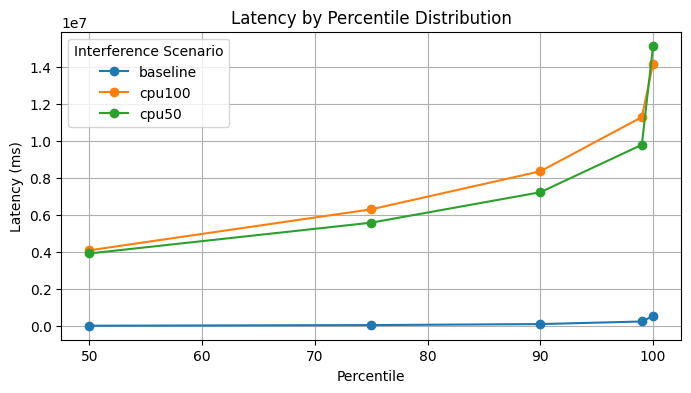

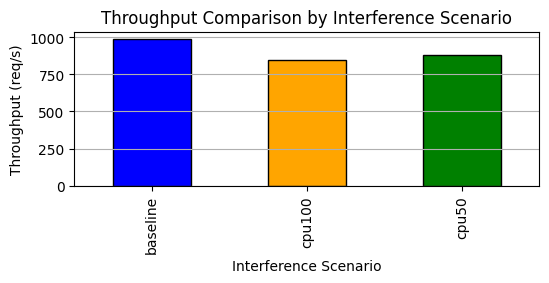

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Optionally, if you need to filter the DataFrame for a specific test case, use:
# test_case = "your_test_case_id"
# test_df = social_network_workload_df[social_network_workload_df['TestCaseID'] == test_case]
# If not needed, simply use the full DataFrame:
test_df = social_network_workload_df

# Define the latency percentile columns and the corresponding labels
latency_cols = ["P50_Latency", "P75_Latency", "P90_Latency", "P99_Latency", "Max_Latency"]
percentile_labels = [50, 75, 90, 99, 100]  # treating Max_Latency as the 100th percentile

# Plot latency percentile distributions for each interference scenario
plt.figure(figsize=(8, 4))
for scenario in test_df['Interference'].unique():
    if scenario.startswith("cpu") or scenario=="baseline":
        scenario_row = test_df[test_df['Interference'] == scenario].iloc[0]
        latencies = [scenario_row[col] for col in latency_cols]
        plt.plot(percentile_labels, latencies, marker='o', label=scenario)

plt.title("Latency by Percentile Distribution")
plt.xlabel("Percentile")
plt.ylabel("Latency (ms)")
plt.legend(title="Interference Scenario")
plt.grid(True)
plt.show()

# Plot throughput comparison using a bar chart.
plt.figure(figsize=(6, 2))
# If each interference scenario has a single value, we can directly plot them:
throughput_data = test_df.set_index('Interference')['Throughput']
# Otherwise, if there are multiple rows per scenario, you could compute mean throughput:
# throughput_data = test_df.groupby('Interference')['Throughput'].mean()
# Filter for only the baseline and cpu scenarios
throughput_data = throughput_data[throughput_data.index.str.startswith("cpu") | (throughput_data.index == "baseline")]

throughput_data.plot(kind='bar', color=['blue', 'orange', 'green'], edgecolor='black')
plt.title("Throughput Comparison by Interference Scenario")
plt.xlabel("Interference Scenario")
plt.ylabel("Throughput (req/s)")
plt.grid(axis='y')
plt.show()


### 2.2 Normalized Perfomance

In [23]:
# Normalized Throughput Perfomance
# For the scenarios in cpu interference, we can calculate the normalized throughput performance.

# Create the dataset from social_network_workload_df with only the baseline and the cpu interference scenarios
cpu_interference_df = social_network_workload_df[test_df['Interference'].str.startswith("cpu") | (social_network_workload_df['Interference'] == "baseline")]
# Create a new DataFrame to hold the normalized throughput performance for each scenario
normalized_throughput_df = pd.DataFrame(columns=["Interference", "Normalized Throughput"])
# Calculate the normalized throughput performance
for scenario in cpu_interference_df['Interference'].unique():
    if scenario.startswith("cpu") or scenario=="baseline":
        scenario_row = cpu_interference_df[cpu_interference_df['Interference'] == scenario].iloc[0]
        baseline_throughput = cpu_interference_df[cpu_interference_df['Interference'] == "baseline"]['Throughput'].values[0]
        normalized_throughput = scenario_row['Throughput'] / baseline_throughput
        normalized_throughput_df = pd.concat([normalized_throughput_df, pd.DataFrame({"Interference": [scenario], "Normalized Throughput": [normalized_throughput]})], ignore_index=True)
# Display the normalized throughput DataFrame
display(normalized_throughput_df.head(5))



,Interference,Normalized Throughput
0,baseline,1.000000
1,cpu100,0.856903
2,cpu50,0.888737


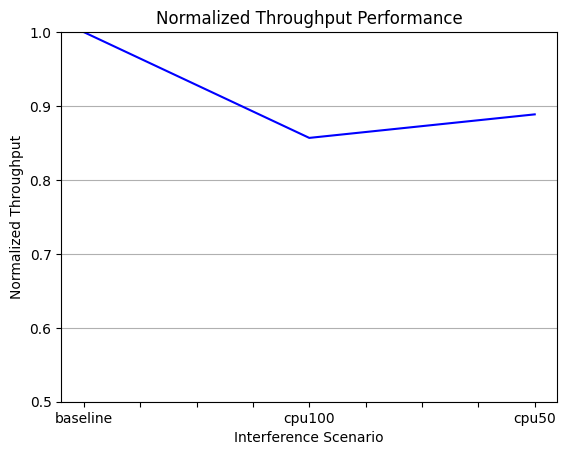

In [28]:
# Plot normalized throughput performance for the normalized_throughput_df
# Plot normalized throughput performance
normalized_throughput_df.set_index("Interference")["Normalized Throughput"].plot(color=["blue", "orange", "green"])
plt.title("Normalized Throughput Performance")
plt.xlabel("Interference Scenario")
plt.ylabel("Normalized Throughput")
plt.ylim(0.50, 1.00)  # Set y-axis limits from 0.00 to 1.00
plt.grid(axis="y")
plt.show()



In [33]:
# Normalized Latency Perfomance
# For the scenarios in cpu interference, we can calculate the normalized latency performance.
# Create a new DataFrame to hold the normalized latency performance for each scenario
normalized_latency_df = pd.DataFrame(columns=["Interference", "Normalized Latency"])
# Calculate the normalized latency performance
for scenario in cpu_interference_df['Interference'].unique():
    if scenario.startswith("cpu") or scenario=="baseline":
        scenario_row = cpu_interference_df[cpu_interference_df['Interference'] == scenario].iloc[0]
        baseline_latency = cpu_interference_df[cpu_interference_df['Interference'] == "baseline"]['P99_Latency'].values[0]
        normalized_latency = baseline_latency / scenario_row['P99_Latency']
        normalized_latency_df = pd.concat([normalized_latency_df, pd.DataFrame({"Interference": [scenario], "Normalized Latency": [normalized_latency]})], ignore_index=True)
# Display the normalized latency DataFrame
display(normalized_latency_df.head(5))

,Interference,Normalized Latency
0,baseline,1.000000
1,cpu100,0.023172
2,cpu50,0.026699


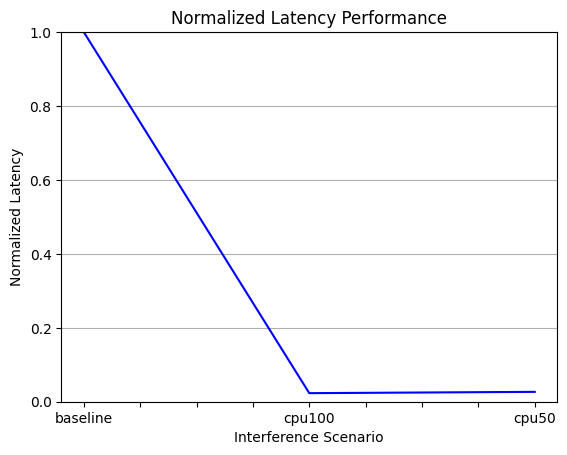

In [36]:
# Plot Normalized Latency performance
normalized_latency_df.set_index("Interference")["Normalized Latency"].plot(color=["blue", "orange", "green"])
plt.title("Normalized Latency Performance")
plt.xlabel("Interference Scenario")
plt.ylabel("Normalized Latency")
plt.ylim(0.00, 1.00)  # Set y-axis limits from 0.00 to 1.00
plt.grid(axis="y")
plt.show()


### 2.3 QoS Degradation

In [39]:
# Create the QoS Degradation DataFrame
# Create a new DataFrame to hold the QoS Degradation for each scenario
qos_degradation_df = pd.DataFrame(columns=["Interference", "QoS Degradation (%)"])

# Calculate the QoS Degradation
for scenario in cpu_interference_df['Interference'].unique():
    if scenario.startswith("cpu") or scenario == "baseline":
        scenario_row = cpu_interference_df[cpu_interference_df['Interference'] == scenario].iloc[0]
        measured_latency = scenario_row['P99_Latency']
        qos_degradation = ((measured_latency - baseline_latency) / baseline_latency) * 100
        qos_degradation_df = pd.concat(
            [qos_degradation_df, pd.DataFrame({"Interference": [scenario], "QoS Degradation (%)": [qos_degradation]})],
            ignore_index=True
        )

# Display the QoS Degradation DataFrame
display(qos_degradation_df.head(5))

,Interference,QoS Degradation (%)
0,baseline,0.000000
1,cpu100,4215.555896
2,cpu50,3645.504629


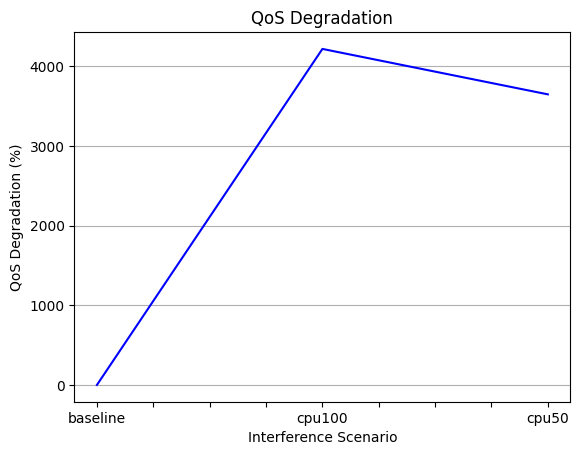

In [41]:
# Plot QoS Degradation performance
qos_degradation_df.set_index("Interference")["QoS Degradation (%)"].plot(color=["blue", "orange", "green"])
plt.title("QoS Degradation")
plt.xlabel("Interference Scenario")
plt.ylabel("QoS Degradation (%)")
plt.grid(axis="y")
plt.show()

### 2.4 SLA Violation

In [ ]:
# Create the SLA Degradation DataFrame